# Importing laibraries

In [1]:
#laibraries for read_data  
import numpy as np
import pandas as pd

# Virsualization for data 
import matplotlib.pyplot as plt

# import Callbacks for EarlySttoping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# important laibary for bulding Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,GlobalAveragePooling2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

# Data Augmentation (THis is bonus part)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read Data From Kaggle

In [2]:
#SPlit our data into 4 parts (x_train,x_test,y_train,y_test)
X_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv').to_numpy()
X_test=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv').to_numpy()
y_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv').to_numpy()-1
y_test=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv').to_numpy()-1

In [3]:
# printing the Shape of data to show no rows,columns 
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [4]:
# We Need to do Reshape our Data 
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [5]:
# printing the Shape of data to show no rows,columns after Reshape
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 32, 32, 1)
X_test shape is  (3359, 32, 32, 1)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [6]:
#Transform y_train,y_test into Categorical data 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

y_train shape is  (13439, 28)
y_test shape is  (3359, 28)


# Data Augmentation

In [8]:
# Data Augmentation
gen=ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.3
)
train_data=gen.flow(
    X_train,
    y_train,
)

# Model

In [9]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


2022-12-13 18:35:54.766944: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Callbacks

In [10]:
reduce=ReduceLROnPlateau(
    factor=0.1,
    min_lr=0.00001
)

In [11]:
callbacks=[reduce]

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          7

# Fiting

In [14]:
model.fit(train_data,epochs=15,validation_data=(X_test,y_test),callbacks=callbacks)

2022-12-13 18:35:55.274369: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
420/420 [==============================] - 18s 41ms/step - loss: 1.6299 - accuracy: 0.4656 - val_loss: 109.3893 - val_accuracy: 0.7175
Epoch 2/15
420/420 [==============================] - 18s 42ms/step - loss: 0.6306 - accuracy: 0.7790 - val_loss: 50.7961 - val_accuracy: 0.8753
Epoch 3/15
420/420 [==============================] - 16s 39ms/step - loss: 0.4353 - accuracy: 0.8492 - val_loss: 41.3812 - val_accuracy: 0.9086
Epoch 4/15
420/420 [==============================] - 17s 40ms/step - loss: 0.3480 - accuracy: 0.8827 - val_loss: 32.1754 - val_accuracy: 0.9259
Epoch 5/15
420/420 [==============================] - 17s 41ms/step - loss: 0.2843 - accuracy: 0.9032 - val_loss: 40.5033 - val_accuracy: 0.9205
Epoch 6/15
420/420 [==============================] - 16s 39ms/step - loss: 0.2480 - accuracy: 0.9167 - val_loss: 36.5773 - val_accuracy: 0.9381
Epoch 7/15
420/420 [==============================] - 17s 40ms/step - loss: 0.2155 - accuracy: 0.9280 - val_loss: 39.7833 - val_a

# Accuracy

In [15]:
losses=pd.DataFrame(model.history.history)

In [16]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,1.629881,0.465585,109.389343,0.717475,0.0010
1,0.630581,0.779001,50.796085,0.875260,0.0010
2,0.435301,0.849245,41.381172,0.908604,0.0010
3,0.347990,0.882655,32.175350,0.925871,0.0010
4,0.284315,0.903192,40.503330,0.920512,0.0010
5,0.247998,0.916660,36.577293,0.938077,0.0010
6,0.215455,0.927971,39.783302,0.938375,0.0010
7,0.197407,0.933849,34.437317,0.952069,0.0010
8,0.182580,0.938909,49.955460,0.916940,0.0010
9,0.169083,0.944341,46.454334,0.938077,0.0010


<AxesSubplot:>

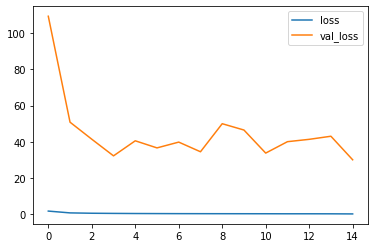

In [17]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

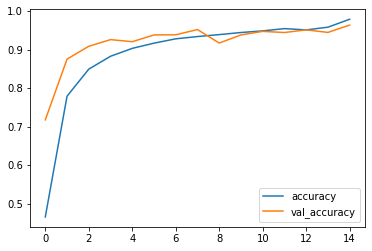

In [18]:
losses[['accuracy','val_accuracy']].plot()

In [19]:
model.evaluate(X_test,y_test)

105/105 [==============================] - 2s 17ms/step - loss: 30.0005 - accuracy: 0.9637


[30.000516891479492, 0.9636796712875366]